# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [ ]:
pip install citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"
weather_api_key = "fc16aa1c36dc2e12c42a13d2320ab938"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | port-aux-francais
Processing Record 3 of Set 1 | ust-nera
Processing Record 4 of Set 1 | wailua homesteads
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | winnemucca
Processing Record 7 of Set 1 | santa rosalia
Processing Record 8 of Set 1 | karratha
Processing Record 9 of Set 1 | ancud
Processing Record 10 of Set 1 | kodiak
Processing Record 11 of Set 1 | west island
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | chonchi
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | bilibino
Processing Record 16 of Set 1 | livadiya
Processing Record 17 of Set 1 | belo sur tsiribihina
Processing Record 18 of Set 1 | puerto natales
Processing Record 19 of Set 1 | kingston
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of Set 1 | margaret river
Processing Rec

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          510
Lat           510
Lng           510
Max Temp      510
Humidity      510
Cloudiness    510
Wind Speed    510
Country       510
Date          510
dtype: int64

In [17]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,15.79,62,34,10.73,SH,1738894671
1,port-aux-francais,-49.3500,70.2167,6.13,80,100,3.93,TF,1738894672
2,ust-nera,64.5667,143.2000,-34.63,96,65,1.60,RU,1738894673
3,wailua homesteads,22.0669,-159.3780,23.96,74,75,2.06,US,1738894674
4,port alfred,-33.5906,26.8910,20.10,85,99,0.45,ZA,1738894675


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,15.79,62,34,10.73,SH,1738894671
1,port-aux-francais,-49.3500,70.2167,6.13,80,100,3.93,TF,1738894672
2,ust-nera,64.5667,143.2000,-34.63,96,65,1.60,RU,1738894673
3,wailua homesteads,22.0669,-159.3780,23.96,74,75,2.06,US,1738894674
4,port alfred,-33.5906,26.8910,20.10,85,99,0.45,ZA,1738894675


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

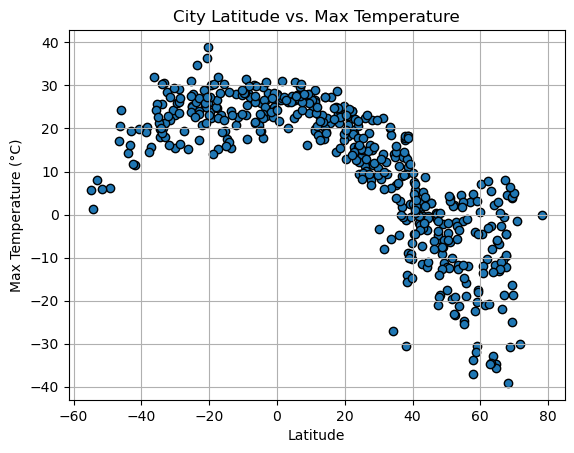

In [24]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

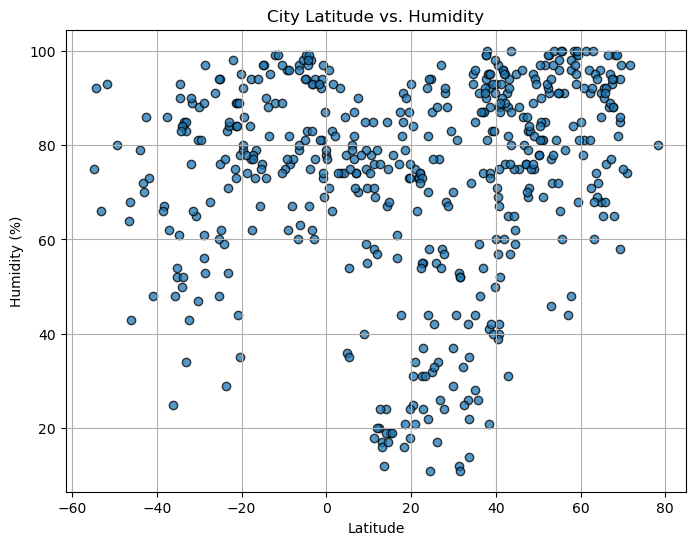

In [28]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

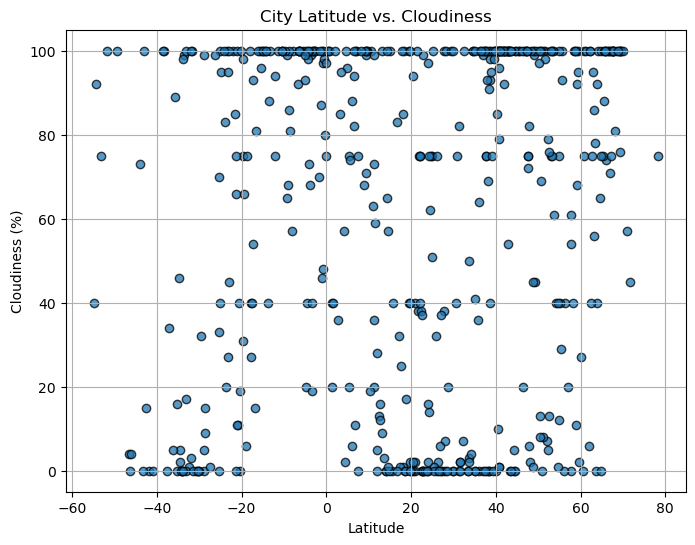

In [30]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

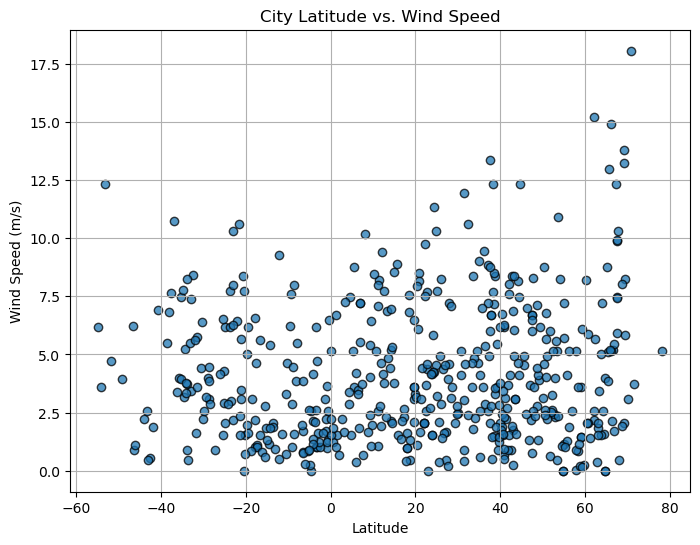

In [32]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8,6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [40]:
# Define a function to create Linear Regression plots
def linear_regression(x_values, y_values, xlabel, ylabel, title):
     # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Calculate regression line
    regression_line = slope * x_values + intercept
    
    # Create scatter plot
    plt.figure(figsize=(8,6))
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
    plt.plot(x_values, regression_line, color="red")  # Add regression line
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    
    # Print R-squared value
    print(f"The r-squared value is: {r_value**2:.3f}")

    # Show plot
    plt.show()

In [49]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ust-nera,64.5667,143.2000,-34.63,96,65,1.60,RU,1738894673
3,wailua homesteads,22.0669,-159.3780,23.96,74,75,2.06,US,1738894674
5,winnemucca,40.9730,-117.7357,3.03,52,100,6.17,US,1738894676
6,santa rosalia,27.3167,-112.2833,16.19,58,0,1.66,MX,1738894677
9,kodiak,57.7900,-152.4072,4.73,48,0,5.14,US,1738894680


In [51]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,15.79,62,34,10.73,SH,1738894671
1,port-aux-francais,-49.3500,70.2167,6.13,80,100,3.93,TF,1738894672
4,port alfred,-33.5906,26.8910,20.10,85,99,0.45,ZA,1738894675
7,karratha,-20.7377,116.8463,36.49,44,11,8.38,AU,1738894678
8,ancud,-41.8697,-73.8203,11.56,73,0,1.90,CL,1738894538


###  Temperature vs. Latitude Linear Regression Plot

The r-squared value is: 0.682


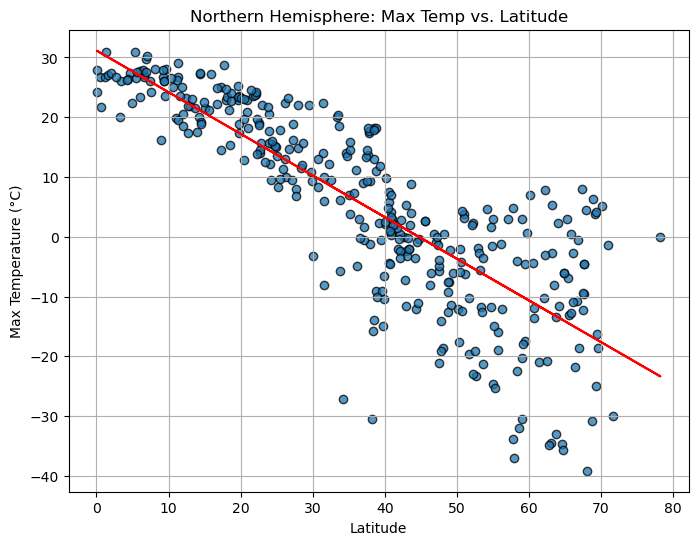

In [54]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 
                  "Latitude", "Max Temperature (°C)", "Northern Hemisphere: Max Temp vs. Latitude")

The r-squared value is: 0.218


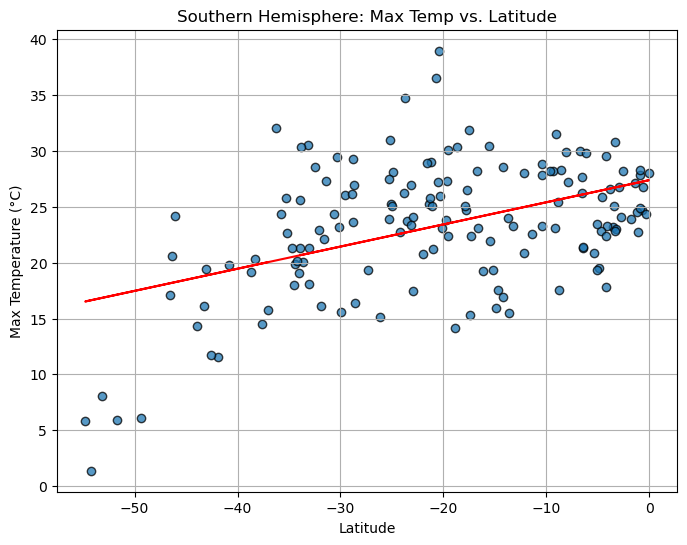

In [56]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                  "Latitude", "Max Temperature (°C)", "Southern Hemisphere: Max Temp vs. Latitude")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared value is: 0.146


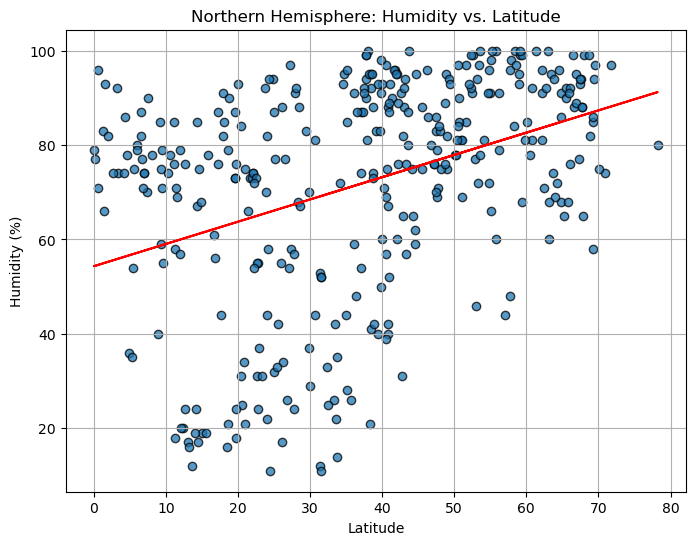

In [60]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 
                  "Latitude", "Humidity (%)", "Northern Hemisphere: Humidity vs. Latitude")

The r-squared value is: 0.115


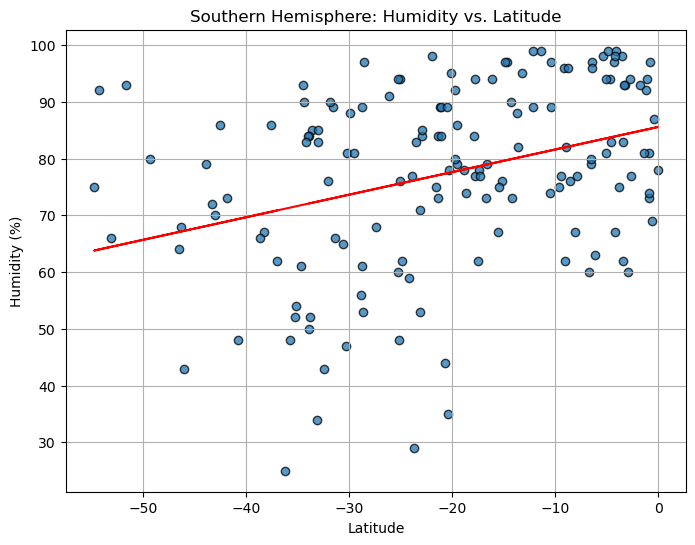

In [62]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], 
                  "Latitude", "Humidity (%)", "Southern Hemisphere: Humidity vs. Latitude")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared value is: 0.051


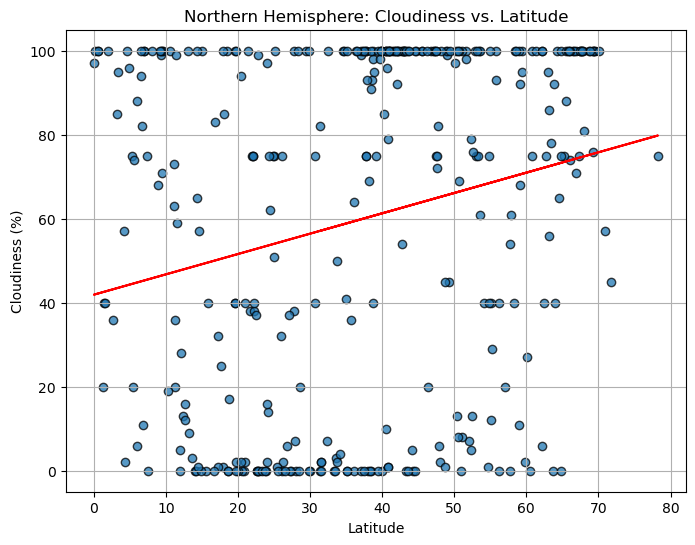

In [66]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 
                  "Latitude", "Cloudiness (%)", "Northern Hemisphere: Cloudiness vs. Latitude")


The r-squared value is: 0.201


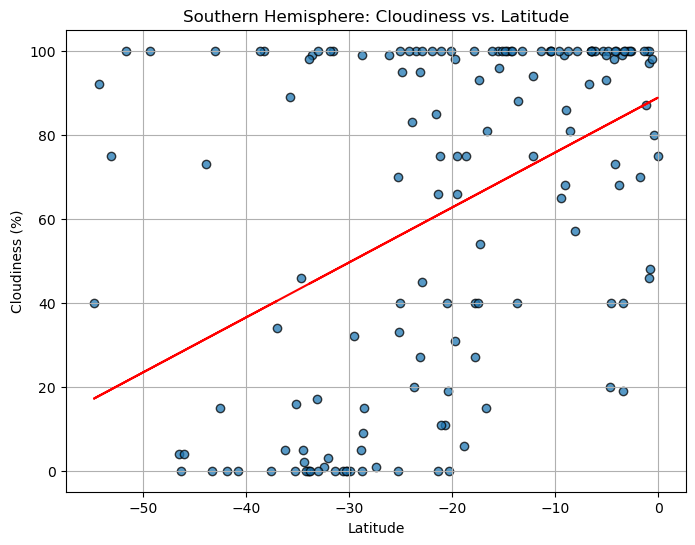

In [68]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                  "Latitude", "Cloudiness (%)", "Southern Hemisphere: Cloudiness vs. Latitude")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared value is: 0.009


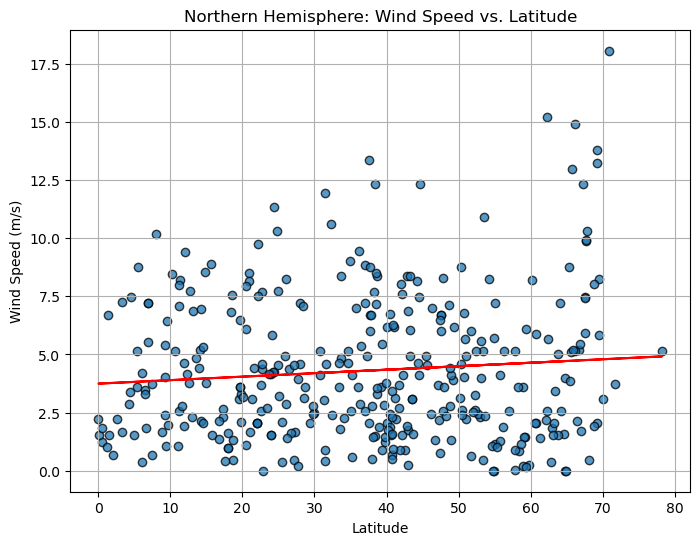

In [72]:
# Northern Hemisphere
linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                  "Latitude", "Wind Speed (m/s)", "Northern Hemisphere: Wind Speed vs. Latitude")

The r-squared value is: 0.100


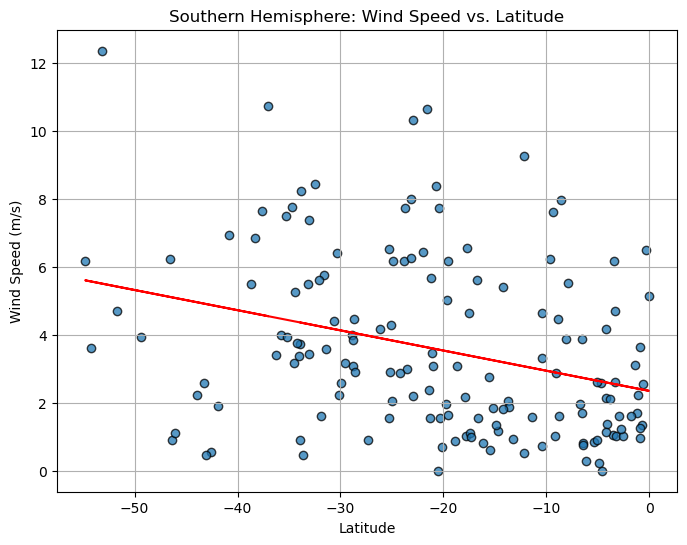

In [74]:
# Southern Hemisphere
linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                  "Latitude", "Wind Speed (m/s)", "Southern Hemisphere: Wind Speed vs. Latitude")

**Discussion about the linear relationship:** YOUR RESPONSE HERE